# Factual/Creative Analysis

In [0]:
import pandas as pd

In [0]:
x_all = pd.read_csv("./data/java_training_data.csv",sep=" ")

In [0]:
x_all.head()

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target
0,aeu.ark+=13960=t9d51x63d,1.0,0.000000,1.0,0.023810,67.0,-0.599705,69.0,36.0,1.175258,4.0,0.272727,0.121212,0.0,0.567164,open
1,aeu.ark+=13960=t9d51x63d,2.0,0.693147,4.0,0.047619,24.0,-0.895092,14.0,5.0,-0.755819,3.0,0.444444,0.000000,0.0,0.208333,open
2,aeu.ark+=13960=t9d51x63d,3.0,1.098612,9.0,0.071429,437.0,1.941999,140.0,54.0,2.296528,4.0,0.162791,0.011628,6.0,0.070938,open
3,aeu.ark+=13960=t9d51x63d,4.0,1.386294,16.0,0.095238,423.0,1.845826,79.0,15.0,-0.132891,3.0,0.093750,0.031250,0.0,0.047281,open
4,aeu.ark+=13960=t9d51x63d,5.0,1.609438,25.0,0.119048,6.0,-1.018742,4.0,2.0,-0.942698,1.0,0.500000,0.000000,0.0,0.833333,open


In [0]:
len(x_all.volume.unique())

1055

In [0]:
# read dataset
x_fact_all = pd.read_csv("./FrontmatterData.tsv",sep="\t",header=None)

In [0]:
x_fact_all.head()

,0,1
0,chi.40727635,"[[""no_content"",""no_content"",""""],[""no_content"",..."
1,coo.31924000431662,"[[""no_content"",""no_content"",""""],[""no_content"",..."
2,coo.31924001144959,"[[""no_content"",""no_content"",""binding""],[""no_co..."
3,coo.31924073896007,"[[""factual"",""cover"",""""],[""no_content"",""no_cont..."
4,coo.31924080009719,"[[""mixed"",""cover"",""cover art photo""],[""mixed"",..."


The data is completely differnet than the frontmatter analysis, so I need to get the extracted feature data from HTRC

In [0]:
len(x_fact_all[0].values)

900

## Download the EF volume on the testing set using EF_HTRC python library

In [0]:
!pip install htrc-feature-reader

     |████████████████████████████████| 194kB 5.4MB/s 
     |████████████████████████████████| 215kB 33.8MB/s 
  Created wheel for htrc-feature-reader: filename=htrc_feature_reader-1.99-cp36-none-any.whl size=13605 sha256=0a1c17f9679c6756fa4a472cca4d206f86f633c9373bd30f2f507c9c0152d4be
  Stored in directory: /root/.cache/pip/wheels/4f/18/43/63eb2e1e2e0a169866c024e84c44cdd23ad0507d27c3c6b2e9
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68036 sha256=529885f0afdbf343a78a19ac85c656a59cf70ab38464e005882b6edca78e4d26
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Created wheel for pymarc: filename=pymarc-3.1.13-cp36-none-any.whl size=145759 sha256=9a0c8587e18e6d7610900ce99fd4eee7d2772feae4ddc842cd70d5693e771e88
  Stored in directory: /root/.cache/pip/wheels/94/ab/33/6cc81cb18d16cc4704c9fd6e11636cae7f99660cb4a7361e62
Successfully built htrc-feature-reader ujson pymarc


In [0]:
import urllib.parse

urllib.parse.quote("aeu.ark+=13960=t9d51x63d")

'aeu.ark%2B%3D13960%3Dt9d51x63d'

In [0]:
vol_ids = [urllib.parse.quote(x) for x in x_fact_all[0].unique()]

In [0]:
vol_ids

['chi.40727635',
 'coo.31924000431662',
 'coo.31924001144959',
 'coo.31924073896007',
 'coo.31924080009719',
 'coo.31924094241217',
 'coo.31924098538329',
 'ien.35556003776788',
 'inu.30000070597756',
 'inu.30000081728184',
 'inu.30000093900276',
 'inu.30000115509105',
 'inu.30000115798963',
 'inu.30000117802359',
 'inu.32000007770185',
 'inu.39000001168165',
 'mdp.39015000426158',
 'mdp.39015002985037',
 'mdp.39015006404092',
 'mdp.39015009147821',
 'mdp.39015012654490',
 'mdp.39015018230873',
 'mdp.39015021525475',
 'mdp.39015028575051',
 'mdp.39015028686320',
 'mdp.39015035384133',
 'mdp.39015041878987',
 'mdp.39015041920581',
 'mdp.39015046811660',
 'mdp.39015054437911',
 'mdp.39015058723985',
 'mdp.39015058747786',
 'mdp.39015059268014',
 'mdp.39015059314008',
 'mdp.39015062118842',
 'mdp.39015063635422',
 'mdp.39015065053715',
 'mdp.39015067434657',
 'mdp.39015069671421',
 'mdp.39015070446375',
 'mdp.39015071112745',
 'mdp.39015073956255',
 'mdp.39015074369391',
 'mdp.39015078660

In [0]:
from htrc_features import FeatureReader
#ef_list = []
#for vol_id in x_all.volume.unique():
#fr = FeatureReader(ids=vol_ids)


In [0]:
!pip install jsonpickle

In [0]:
import jsonpickle

## Save the EF in a json file

In [0]:
vol_ids

['chi.40727635',
 'coo.31924000431662',
 'coo.31924001144959',
 'coo.31924073896007',
 'coo.31924080009719',
 'coo.31924094241217',
 'coo.31924098538329',
 'ien.35556003776788',
 'inu.30000070597756',
 'inu.30000081728184',
 'inu.30000093900276',
 'inu.30000115509105',
 'inu.30000115798963',
 'inu.30000117802359',
 'inu.32000007770185',
 'inu.39000001168165',
 'mdp.39015000426158',
 'mdp.39015002985037',
 'mdp.39015006404092',
 'mdp.39015009147821',
 'mdp.39015012654490',
 'mdp.39015018230873',
 'mdp.39015021525475',
 'mdp.39015028575051',
 'mdp.39015028686320',
 'mdp.39015035384133',
 'mdp.39015041878987',
 'mdp.39015041920581',
 'mdp.39015046811660',
 'mdp.39015054437911',
 'mdp.39015058723985',
 'mdp.39015058747786',
 'mdp.39015059268014',
 'mdp.39015059314008',
 'mdp.39015062118842',
 'mdp.39015063635422',
 'mdp.39015065053715',
 'mdp.39015067434657',
 'mdp.39015069671421',
 'mdp.39015070446375',
 'mdp.39015071112745',
 'mdp.39015073956255',
 'mdp.39015074369391',
 'mdp.39015078660

In [0]:
--- only run this once, get data from htrc server
# only run this once, get data from htrc server
with open("ef-fact-creat-vols.json","w") as file:
  for vol in vol_ids:
    fr_vol = FeatureReader(ids=[vol])
    try:
      for my_vol in fr_vol:
        print(my_vol.id)
        file.write(jsonpickle.dumps(my_vol)+"\n")        
    except BaseException as ex:
      print("error fecthing vol ",ex)
      continue

## Read EF Json File

In [0]:
import json 
len(json.loads(x_fact_all.iloc[0][1]))

20

In [0]:
x_fact_page = [] 

In [0]:
import json
for val in x_fact_all.values:
  dump_val = json.loads(val[1])
  #print(dump_val)
  for i,page in enumerate(dump_val):
    temp = [val[0],i]
    #print(page)
    temp.extend(page)
    x_fact_page.append(temp)

In [0]:
x_fact_page_df = pd.DataFrame(x_fact_page,columns=["vol_id","page","type","sub_type","add"])

In [0]:
x_fact_page_df.head()

,vol_id,page,type,sub_type,add
0,chi.40727635,0,no_content,no_content,
1,chi.40727635,1,no_content,no_content,stamp
2,chi.40727635,2,no_content,no_content,
3,chi.40727635,3,no_content,no_content,
4,chi.40727635,4,factual,title,


In [0]:
x_fact_page_df.describe()

,page
count,18000.000000
mean,9.500000
std,5.766441
min,0.000000
25%,4.750000
50%,9.500000
75%,14.250000
max,19.000000


In [0]:
x_fact_page_df.type.unique()

array(['no_content', 'factual', 'creative', 'mixed'], dtype=object)

In [0]:
x_fact_page_df.sub_type.unique()

array(['no_content', 'title', 'pub_info', 'list', 'main_text',
       'pref_text', 'cover', 'ad', 'image', 'appendix', 'dedication',
       'poem', 'epigraph'], dtype=object)

In [0]:
x_fact_page_df["add"].unique()[:10]

array(['', 'stamp', 'barcode, due date slip', 'foreword', 'data table',
       'binding', 'library bookplate', 'due date slip, barcode',
       'preface', 'due date slip'], dtype=object)

In [0]:
!pip install roman

In [0]:
import roman
import numpy as np

def roman_count(t):
  is_roman = []
  for val in t.tokenlist().reset_index().token.values:
    try:
      #print(roman.fromRoman(val))
      #print(val)
      is_roman.append(True)
    except:
      #print("{} not roman".format(val))
      is_roman.append(False)
      pass
  return np.sum(is_roman)

In [0]:

# transform statistical values for every pages from EF
def transform_page_stat(t):
  line_count = t.line_count()
  token_count = t.token_count()
  empty_line_count = t.empty_line_count()
  cap_alpha_seq = t.cap_alpha_seq()
  total_sentence = sum(t._json["body"]["beginCharCounts"].values())
  total_capital = sum([t._json["body"]["beginCharCounts"][x] if x.isupper() else 0 for x in t._json["body"]["beginCharCounts"].keys()])
  total_numeric = sum([t._json["body"]["endCharCount"][x] if x.isnumeric() else 0 for x in t._json["body"]["endCharCount"].keys()])
  if total_sentence > 0:
    pct_begin_char_caps = total_capital/total_sentence
    pct_end_numeric = total_numeric/total_sentence
  else:
    pct_begin_char_caps = 0
    pct_end_numeric = 0
  total_roman = roman_count(t)
  if t.token_count() > 0:      
    pct_all_caps = t.tokenlist().loc[[x.isupper() for x in t.tokenlist().reset_index().token.values],:]["count"].sum()/t.token_count()
    pct_roman = total_roman/t.token_count()
  else:
    pct_all_caps = 0
    pct_roman = 0
  return [line_count,token_count,empty_line_count,total_sentence,total_capital,total_numeric,pct_begin_char_caps,pct_end_numeric,pct_all_caps,pct_roman]

In [0]:
--- no need to run this because we created the extracted features dataframe
# run this only once to transform extracted feature pages into list of dataframe 

all_ef = []
with open("ef-fact-creat-vols.json","r") as file:
  i = 0
  for line in file:
    #print(line)
    test = jsonpickle.loads(line)
    #all_ef.append(test)
    all_pages = list(test.pages())
    print(test.volume_identifier)
    # check the sequence on the dataset
    for i,page in enumerate(all_pages):
      # seq start from 1, pages index processor start from 0
      temp = [test.volume_identifier,i]
      temp.extend(transform_page_stat(page))
      all_ef.append(temp)
    i+=1
    #break


In [0]:
# save in pickle so we don't need to rerun the stuff above
import pickle
#with open("all_ef_fact_creat.pickle","wb") as file:
#  pickle.dump(all_ef,file)

with open("all_ef_fact_creat.pickle","rb") as file:
  all_ef = pickle.load(file)


In [0]:
all_ef_df = pd.DataFrame(all_ef,columns=["vol_id","page","line_count","token_count","empty_line_count","total_sentence","total_capital","total_numeric","pct_begin_char_caps","pct_end_numeric","pct_all_caps","pct_roman"])

In [0]:
all_ef_df.head()

,vol_id,page,line_count,token_count,empty_line_count,total_sentence,total_capital,total_numeric,pct_begin_char_caps,pct_end_numeric,pct_all_caps,pct_roman
0,chi.40727635,0,1,0,1,0,0,0,0.000000,0.000000,0.000,0.000
1,chi.40727635,1,1,0,1,0,0,0,0.000000,0.000000,0.000,0.000
2,chi.40727635,2,0,0,0,0,0,0,0.000000,0.000000,0.000,0.000
3,chi.40727635,3,1,1,0,1,0,1,0.000000,1.000000,0.000,1.000
4,chi.40727635,4,18,40,0,18,11,4,0.611111,0.222222,0.625,0.875


In [0]:
all_ef_df.describe()

,page,line_count,token_count,empty_line_count,total_sentence,total_capital,total_numeric,pct_begin_char_caps,pct_end_numeric,pct_all_caps,pct_roman
count,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000,328866.000000
mean,304.492273,58.602644,448.937014,0.675196,57.927448,16.728433,9.741037,0.285407,0.089526,0.048917,0.539988
std,266.873522,67.295220,327.134860,5.064277,66.844103,24.817463,40.706295,0.222578,0.180336,0.103189,0.194320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,32.000000,259.000000,0.000000,31.000000,5.000000,0.000000,0.142857,0.000000,0.004274,0.467641
50%,232.000000,41.000000,415.000000,0.000000,41.000000,10.000000,1.000000,0.234043,0.024390,0.017787,0.550336
75%,439.000000,59.000000,571.000000,0.000000,58.000000,19.000000,3.000000,0.368421,0.065574,0.048485,0.641667
max,1855.000000,1699.000000,7332.000000,1184.000000,1547.000000,571.000000,1490.000000,1.000000,1.000000,1.000000,1.000000


Combine the classificationa nd feature set

In [0]:
x_feature_merge = x_fact_page_df.merge(all_ef_df,left_on=["vol_id","page"],right_on=["vol_id","page"])

In [0]:
x_feature_merge.head()

,vol_id,page,type,sub_type,add,line_count,token_count,empty_line_count,total_sentence,total_capital,total_numeric,pct_begin_char_caps,pct_end_numeric,pct_all_caps,pct_roman
0,chi.40727635,0,no_content,no_content,,1,0,1,0,0,0,0.000000,0.000000,0.000,0.000
1,chi.40727635,1,no_content,no_content,stamp,1,0,1,0,0,0,0.000000,0.000000,0.000,0.000
2,chi.40727635,2,no_content,no_content,,0,0,0,0,0,0,0.000000,0.000000,0.000,0.000
3,chi.40727635,3,no_content,no_content,,1,1,0,1,0,1,0.000000,1.000000,0.000,1.000
4,chi.40727635,4,factual,title,,18,40,0,18,11,4,0.611111,0.222222,0.625,0.875


In [0]:
type_list = x_feature_merge.type.unique().tolist()
print(type_list)

['no_content', 'factual', 'creative', 'mixed']


In [0]:
x_feature_merge["type_class"] = x_feature_merge.type.apply(lambda x:type_list.index(x))

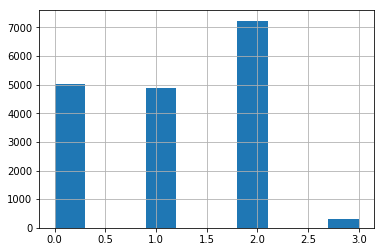

In [0]:
x_feature_merge.type_class.hist()

Split training and test set, 70% vs 30%

In [0]:
X = x_feature_merge.loc[:,["line_count","token_count","empty_line_count","total_sentence","total_capital","total_numeric","pct_begin_char_caps","pct_end_numeric","pct_all_caps"]]
X = X.to_numpy()

In [0]:
y = x_feature_merge.type_class.to_numpy()

In [0]:
X.shape

(17456, 9)

In [0]:
# split training and testing
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Best on previous analysis random forest is the best predictor on frontmatter analysis so we use random forest

# Try different approach on predicting the content

## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Import metrics for computing accuracy
from sklearn import metrics

clf_rf = RandomForestClassifier(n_estimators=200, max_depth=20,
                              random_state=0)
clf_rf.fit(X_train, y_train)  
print(clf_rf.feature_importances_)

[0.08359281 0.21483933 0.03353708 0.11304666 0.09339836 0.03908331
 0.21575928 0.09322133 0.11352183]


In [0]:
y_hat = clf_rf.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat,target_names=type_list))

              precision    recall  f1-score   support

  no_content       0.84      0.91      0.88      1522
     factual       0.81      0.79      0.80      1459
    creative       0.89      0.89      0.89      2159
       mixed       0.30      0.06      0.10        97

    accuracy                           0.85      5237
   macro avg       0.71      0.66      0.67      5237
weighted avg       0.85      0.85      0.85      5237



### creative content prediction is more important, therefore it is better to have false positive on creative content rather than false negative on creative content class, we analyze the probability distribution accross class to get the right probability threshold for each class

In [0]:
rf_probs = clf_rf.predict_proba(X_train)

In [0]:
y_train_pred = clf_rf.predict(X_train)

In [0]:
rf_probs[y_train_pred!=y_train].shape

(422, 4)

we found from the training set that we have 422 mixed miss classification, we filter for confussion on creative content and get the threshold for the class 2

In [0]:
rf_probs[(y_train_pred!=y_train)&(y_train==2)].shape
print(rf_probs[(y_train_pred!=y_train)&(y_train==2)].min(axis=0))
print(rf_probs[(y_train_pred!=y_train)&(y_train==2)].mean(axis=0))
print(rf_probs[(y_train_pred!=y_train)&(y_train==2)].max(axis=0))

[0.         0.         0.01138271 0.        ]
[0.75869753 0.0835407  0.13414195 0.02361982]
[0.95883477 0.80310741 0.44428788 0.29777083]


(array([ 23.,   2., 109.,   4.,   7.,   1.,   4.,   2.,   6.,   4.]),
 array([0.01138271, 0.05467322, 0.09796374, 0.14125426, 0.18454478,
        0.22783529, 0.27112581, 0.31441633, 0.35770684, 0.40099736,
        0.44428788]),
 <a list of 10 Patch objects>)

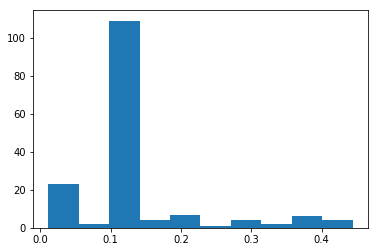

In [0]:
from matplotlib import pyplot as plt
plt.hist(rf_probs[(y_train_pred!=y_train)&(y_train==2)][:,2])

In [0]:
rf_probs[(y_train_pred!=y_train)&(y_train==2)]

array([[7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [5.34848485e-02, 5.02227273e-01, 4.44287879e-01, 0.00000000e+00],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [9.58834767e-01, 2.87631771e-02, 1.13827070e-02, 1.01934842e-03],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [8.17717885e-01, 6.63133121e-02, 1.15968803e-01, 0.00000000e+00],
       [6.25753769e-01, 4.09482417e-02, 1.94847369e-01, 1.38450620e-01],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [6.38264991e-01, 8.69325322e-02, 1.78376615e

In [0]:
metrics.accuracy_score(y_train,y_train_pred)
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3515
           1       0.99      0.94      0.97      3412
           2       0.99      0.97      0.98      5071
           3       1.00      0.81      0.90       221

    accuracy                           0.97     12219
   macro avg       0.97      0.93      0.95     12219
weighted avg       0.97      0.97      0.97     12219



(array([29., 18., 63., 12., 20., 18., 24., 16., 20., 14.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

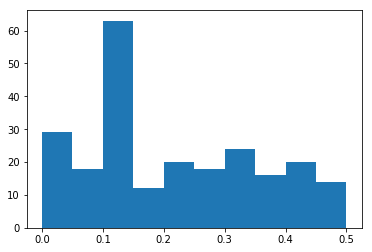

In [0]:
rf_probs_test = clf_rf.predict_proba(X_test)
plt.hist(rf_probs_test[(y_hat!=y_test)&(y_test==2)][:,2])

In [0]:
rf_probs_test[(y_hat!=y_test)&(y_test==2)]

array([[2.00000000e-02, 6.95000000e-01, 2.65000000e-01, 2.00000000e-02],
       [1.50000000e-02, 6.20000000e-01, 3.65000000e-01, 0.00000000e+00],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [5.47178571e-01, 4.14071429e-01, 2.45833333e-02, 1.41666667e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [0.00000000e+00, 5.90000000e-01, 3.90000000e-01, 2.00000000e-02],
       [9.50000000e-02, 5.80000000e-01, 3.15000000e-01, 1.00000000e-02],
       [0.00000000e+00, 8.70000000e-01, 1.20000000e-01, 1.00000000e-02],
       [7.88321373e-01, 6.98394121e-02, 1.18912597e-01, 2.29266179e-02],
       [4.00000000e-01, 1.50000000e-01, 3.80000000e

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

Normalized confusion matrix


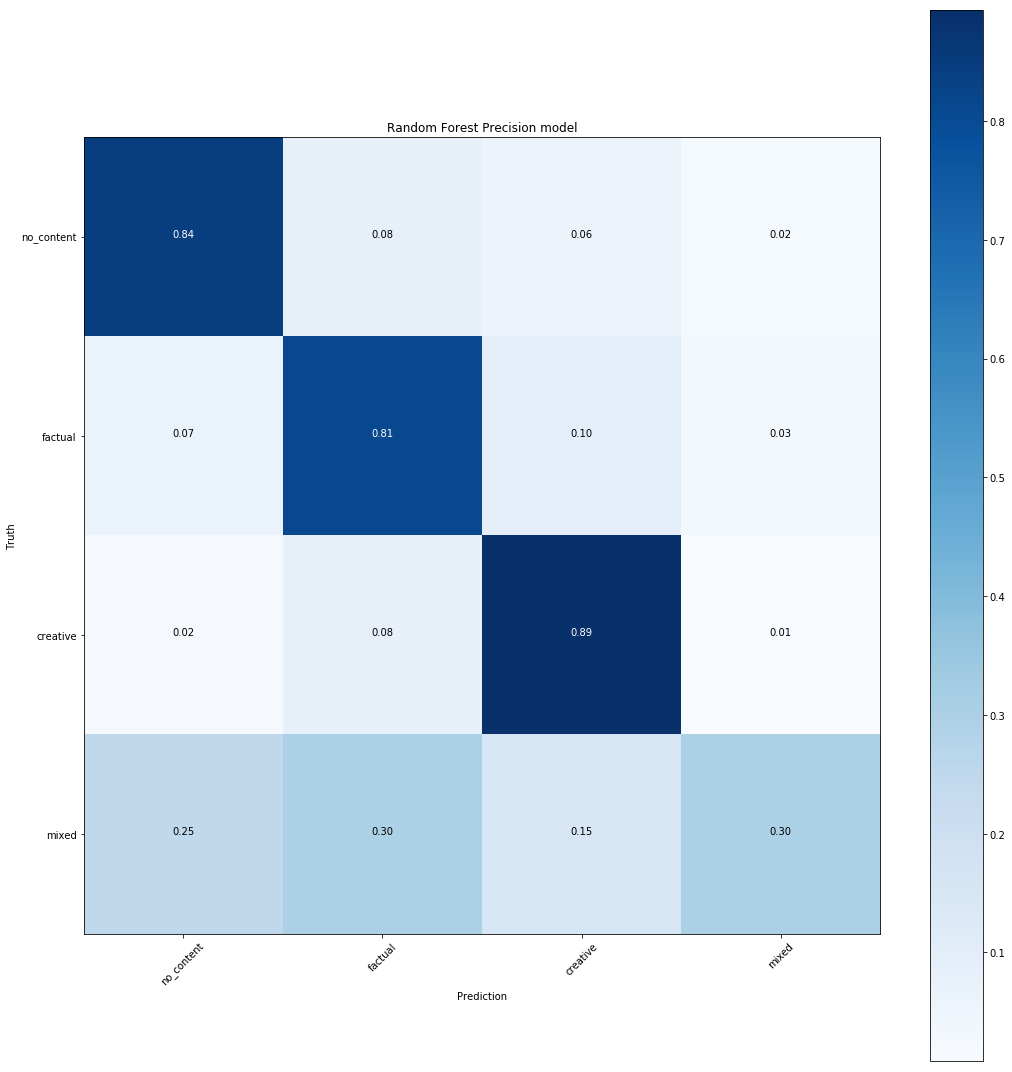

In [0]:
import numpy as np
cnf_matrix = confusion_matrix(y_hat,y_test)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=type_list, normalize=True,
                      title="{} model".format("Random Forest Precision"))

# Split training into training and validation

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Import metrics for computing accuracy
from sklearn import metrics
np.random.seed(27)
# bootstrap training 10 times
cv_result = []
for i in range(10):
  print(i)
  X_traini, X_valid, y_traini, y_valid = train_test_split(X_train, y_train, test_size=0.30)
  clf_rf = RandomForestClassifier(n_estimators=200, max_depth=20,
                                random_state=0)
  clf_rf.fit(X_traini, y_traini)  
  y_hat = clf_rf.predict(X_valid)
  acc = metrics.accuracy_score(y_valid,y_hat)
  met = metrics.classification_report(y_valid,y_hat,target_names=type_list)
  print(acc)
  print(met)
  cv_result.append((i,acc,met,clf_rf))

0
0.8529732678668849
              precision    recall  f1-score   support

  no_content       0.83      0.92      0.87      1000
     factual       0.81      0.79      0.80      1044
    creative       0.90      0.88      0.89      1558
       mixed       0.07      0.02      0.03        64

    accuracy                           0.85      3666
   macro avg       0.65      0.65      0.65      3666
weighted avg       0.84      0.85      0.85      3666

1
0.8567921440261865
              precision    recall  f1-score   support

  no_content       0.86      0.90      0.88      1032
     factual       0.80      0.82      0.81      1017
    creative       0.90      0.88      0.89      1558
       mixed       0.18      0.03      0.06        59

    accuracy                           0.86      3666
   macro avg       0.68      0.66      0.66      3666
weighted avg       0.85      0.86      0.85      3666

2
0.86442989634479
              precision    recall  f1-score   support

  no_content  

In [0]:
print(sorted(cv_result,key=lambda x:x[2],reverse=True)[0])



(4, 0.8603382433169667, '              precision    recall  f1-score   support\n\n  no_content       0.87      0.91      0.89      1079\n     factual       0.80      0.81      0.81      1040\n    creative       0.90      0.89      0.90      1495\n       mixed       0.18      0.04      0.06        52\n\n    accuracy                           0.86      3666\n   macro avg       0.69      0.66      0.66      3666\nweighted avg       0.85      0.86      0.86      3666\n', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False))


(array([5., 7., 7., 5., 5., 5., 6., 5., 4., 6.]),
 array([0.02, 0.06, 0.11, 0.15, 0.2 , 0.24, 0.29, 0.33, 0.38, 0.42, 0.47]),
 <a list of 10 Patch objects>)

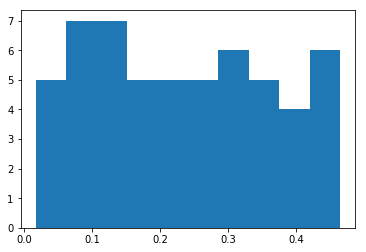

In [0]:
rf_probs = cv_result[4][3].predict_proba(X_valid)[:,2]
y_hat_valid = cv_result[4][3].predict(X_valid)
plt.hist(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)])

we only care with creative recall so we check the missclassified creative predicition to put more weight into the creative content prediction

In [0]:
y_hat_valid

array([2, 1, 1, ..., 0, 1, 2])

In [0]:
rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].shape
print(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].min(axis=0))
print(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].mean(axis=0))
print(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].max(axis=0))

0.0
0.18251879350303934
0.48181818181818187


Instead of using the default threshold (maximum), we will use the mean from our observation above 0.2 as our threshold for creative prediction

In [0]:
y_hat_probs = cv_result[4][3].predict_proba(X_test)

In [0]:
#metrics.accuracy_score(y_test,np.argmax(y_hat_probs,axis=1))
y_hat_test = np.argmax(y_hat_probs,axis=1)

In [0]:
y_hat_test.shape

(5237,)

In [0]:
np.sum(y_hat_test!=2)

3083

In [0]:
y_hat_test[np.argwhere((y_hat_test!=2)&(y_hat_probs[:,2]>0.2))]=2

In [0]:
y_hat_test[y_hat_test!=2][y_hat_probs[y_hat_test!=2,2]>0.2] = 2

In [0]:
np.sum(y_hat_test!=2)

2736

In [0]:
#y_hat = cv_result[4][3].predict(X_test)
metrics.accuracy_score(y_test,y_hat_test)
print(metrics.classification_report(y_test,y_hat_test,target_names=type_list))

              precision    recall  f1-score   support

  no_content       0.86      0.89      0.87      1522
     factual       0.86      0.68      0.76      1459
    creative       0.81      0.94      0.87      2159
       mixed       0.29      0.04      0.07        97

    accuracy                           0.83      5237
   macro avg       0.70      0.64      0.64      5237
weighted avg       0.83      0.83      0.83      5237



now we have 94% recall over creative contents

Normalized confusion matrix


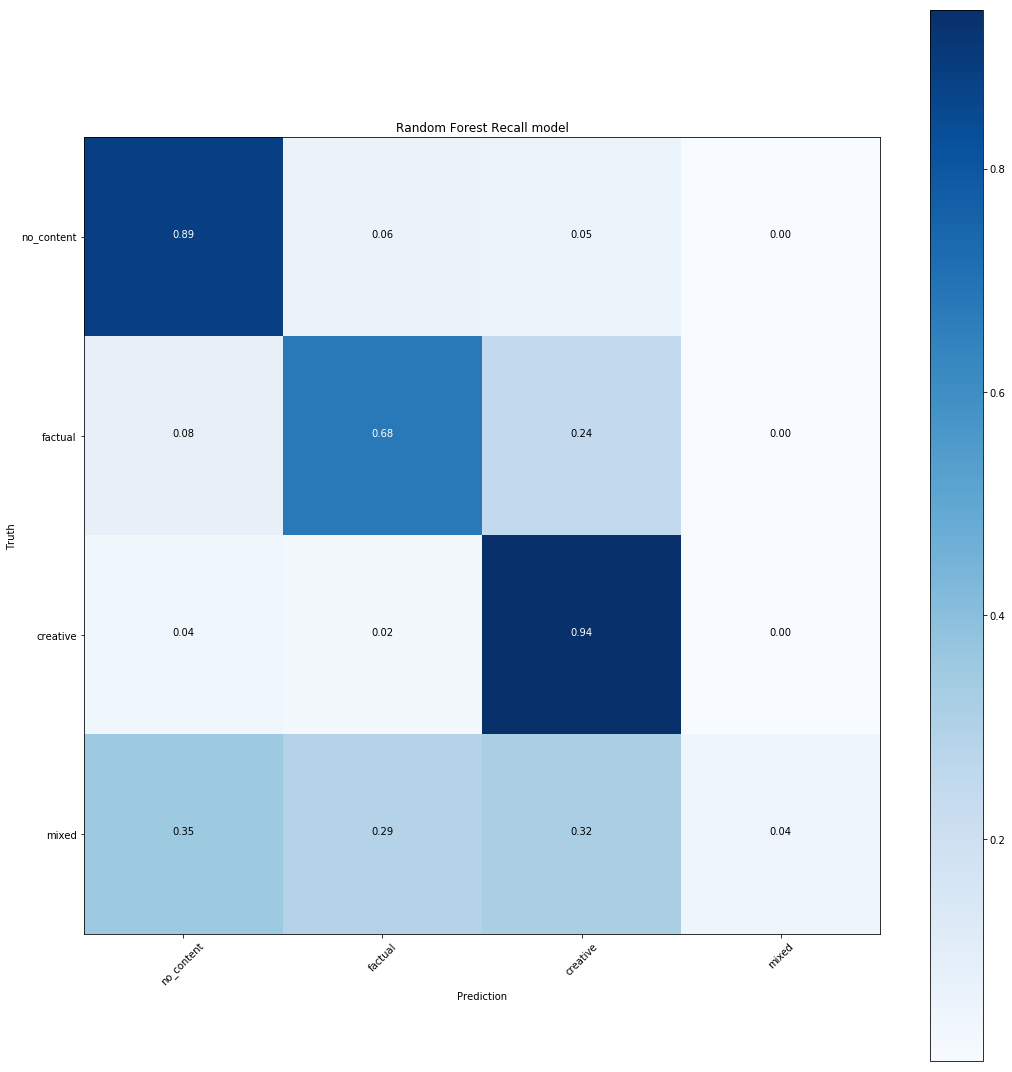

In [0]:
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_hat_test)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=type_list, normalize=True,
                      title="{} model".format("Random Forest Recall"))

With adjusted threshold, we can get 94% recall on creative contents. Which mean our predictor will work most of the time 94% chaance corerect predicting creative content although we ight missclassified 24% of them as factual content


Now we will use sliding window, taking into account the previous row data point (order) for prediction

In [0]:
X.shape

(17456, 9)

In [0]:
X[1:,].shape

(17455, 9)

In [0]:
X[2:,].shape

(17454, 9)

In [0]:
X_3slide = np.zeros((X.shape[0],3*X.shape[1]))

In [0]:
X_3slide[2:,:9] =  X[:-2,]

In [0]:
X_3slide[1:,9:18] =  X[:-1,]

In [0]:
X_3slide[:,18:27] =  X

In [0]:
pd.DataFrame(X_3slide[:10,])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.000000,18.0,40.0,0.0,18.0,11.0,4.0,0.611111,0.222222,0.625000
5,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.000000,18.0,40.0,0.0,18.0,11.0,4.0,0.611111,0.222222,0.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,18.0,40.0,0.0,18.0,11.0,4.0,0.611111,0.222222,0.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,21.0,58.0,0.0,21.0,14.0,4.0,0.666667,0.190476,0.603448
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,21.0,58.0,0.0,21.0,14.0,4.0,0.666667,0.190476,0.603448,18.0,74.0,3.0,15.0,5.0,2.0,0.333333,0.133333,0.229730
8,21.0,58.0,0.0,21.0,14.0,4.0,0.666667,0.190476,0.603448,18.0,74.0,3.0,15.0,5.0,2.0,0.333333,0.133333,0.229730,35.0,405.0,0.0,35.0,23.0,14.0,0.657143,0.400000,0.125926
9,18.0,74.0,3.0,15.0,5.0,2.0,0.333333,0.133333,0.229730,35.0,405.0,0.0,35.0,23.0,14.0,0.657143,0.400000,0.125926,32.0,264.0,0.0,32.0,16.0,15.0,0.500000,0.468750,0.037879


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(7)
X_train3slide, X_test3slide, y_train, y_test = train_test_split(X_3slide, y, test_size=0.30)

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Import metrics for computing accuracy
from sklearn import metrics

clf_rf = RandomForestClassifier(n_estimators=200, max_depth=20,
                              random_state=0)
clf_rf.fit(X_train3slide, y_train)  
print(clf_rf.feature_importances_)

[0.02 0.02 0.01 0.02 0.01 0.01 0.02 0.01 0.01 0.02 0.03 0.01 0.02 0.01
 0.01 0.02 0.01 0.02 0.06 0.15 0.02 0.09 0.08 0.03 0.14 0.07 0.08]


In [0]:
y_hat = clf_rf.predict(X_test3slide)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat,target_names=type_list))

              precision    recall  f1-score   support

  no_content       0.86      0.92      0.89      1522
     factual       0.83      0.82      0.83      1459
    creative       0.91      0.90      0.91      2159
       mixed       0.40      0.02      0.04        97

    accuracy                           0.87      5237
   macro avg       0.75      0.67      0.67      5237
weighted avg       0.86      0.87      0.86      5237



In [0]:
from sklearn.ensemble import RandomForestClassifier
# Import metrics for computing accuracy
from sklearn import metrics
np.random.seed(27)
# bootstrap training 10 times
cv_result = []
for i in range(10):
  print(i)
  X_traini, X_valid, y_traini, y_valid = train_test_split(X_train3slide, y_train, test_size=0.30)
  clf_rf = RandomForestClassifier(n_estimators=200, max_depth=20,
                                random_state=0)
  clf_rf.fit(X_traini, y_traini)  
  y_hat = clf_rf.predict(X_valid)
  acc = metrics.accuracy_score(y_valid,y_hat)
  met = metrics.classification_report(y_valid,y_hat,target_names=type_list)
  print(acc)
  print(met)
  cv_result.append((i,acc,met,clf_rf))

0
0.8663393344244408
              precision    recall  f1-score   support

  no_content       0.85      0.93      0.89      1000
     factual       0.82      0.83      0.83      1044
    creative       0.91      0.88      0.90      1558
       mixed       0.38      0.05      0.08        64

    accuracy                           0.87      3666
   macro avg       0.74      0.67      0.67      3666
weighted avg       0.86      0.87      0.86      3666

1
0.8696126568466994
              precision    recall  f1-score   support

  no_content       0.87      0.91      0.89      1032
     factual       0.81      0.84      0.83      1017
    creative       0.91      0.89      0.90      1558
       mixed       0.14      0.02      0.03        59

    accuracy                           0.87      3666
   macro avg       0.68      0.67      0.66      3666
weighted avg       0.86      0.87      0.86      3666

2
0.8769776322967813
              precision    recall  f1-score   support

  no_content

In [0]:
print(sorted(cv_result,key=lambda x:x[2],reverse=True)[0])



(3, 0.8720676486633934, '              precision    recall  f1-score   support\n\n  no_content       0.88      0.91      0.90      1065\n     factual       0.81      0.85      0.83      1014\n    creative       0.91      0.89      0.90      1527\n       mixed       0.22      0.03      0.06        60\n\n    accuracy                           0.87      3666\n   macro avg       0.71      0.67      0.67      3666\nweighted avg       0.86      0.87      0.87      3666\n', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False))


(array([6., 8., 4., 6., 8., 2., 6., 4., 1., 2.]),
 array([0.01, 0.06, 0.11, 0.16, 0.21, 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.49]),
 <a list of 10 Patch objects>)

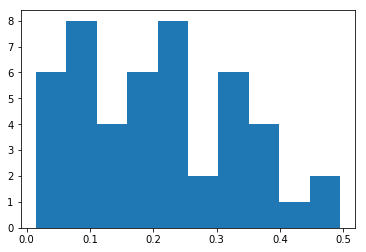

In [0]:
rf_probs = cv_result[3][3].predict_proba(X_valid)[:,2]
y_hat_valid = cv_result[3][3].predict(X_valid)
plt.hist(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)])

we only care with creative recall so we check the missclassified creative predicition to put more weight into the creative content prediction

In [0]:
y_hat_valid

array([2, 1, 1, ..., 0, 1, 2])

In [0]:
rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].shape
print(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].min(axis=0))
print(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].mean(axis=0))
print(rf_probs[(y_hat_valid!=y_valid)&(y_valid==2)].max(axis=0))

0.01435179233444462
0.21158725759630928
0.495


Instead of using the default threshold (maximum), we will use the mean from our observation above 0.2 as our threshold for creative prediction

In [0]:
y_hat_probs = cv_result[3][3].predict_proba(X_test3slide)

In [0]:
#metrics.accuracy_score(y_test,np.argmax(y_hat_probs,axis=1))
y_hat_test = np.argmax(y_hat_probs,axis=1)

In [0]:
y_hat_test.shape

(5237,)

In [0]:
np.sum(y_hat_test!=2)

3097

In [0]:
y_hat_test[np.argwhere((y_hat_test!=2)&(y_hat_probs[:,2]>0.2))]=2

In [0]:
y_hat_test[y_hat_test!=2][y_hat_probs[y_hat_test!=2,2]>0.2] = 2

In [0]:
np.sum(y_hat_test!=2)

2648

In [0]:
#y_hat = cv_result[4][3].predict(X_test)
metrics.accuracy_score(y_test,y_hat_test)
print(metrics.classification_report(y_test,y_hat_test,target_names=type_list))

              precision    recall  f1-score   support

  no_content       0.90      0.87      0.88      1522
     factual       0.88      0.69      0.77      1459
    creative       0.80      0.96      0.87      2159
       mixed       0.14      0.02      0.04        97

    accuracy                           0.84      5237
   macro avg       0.68      0.64      0.64      5237
weighted avg       0.84      0.84      0.83      5237



Normalized confusion matrix


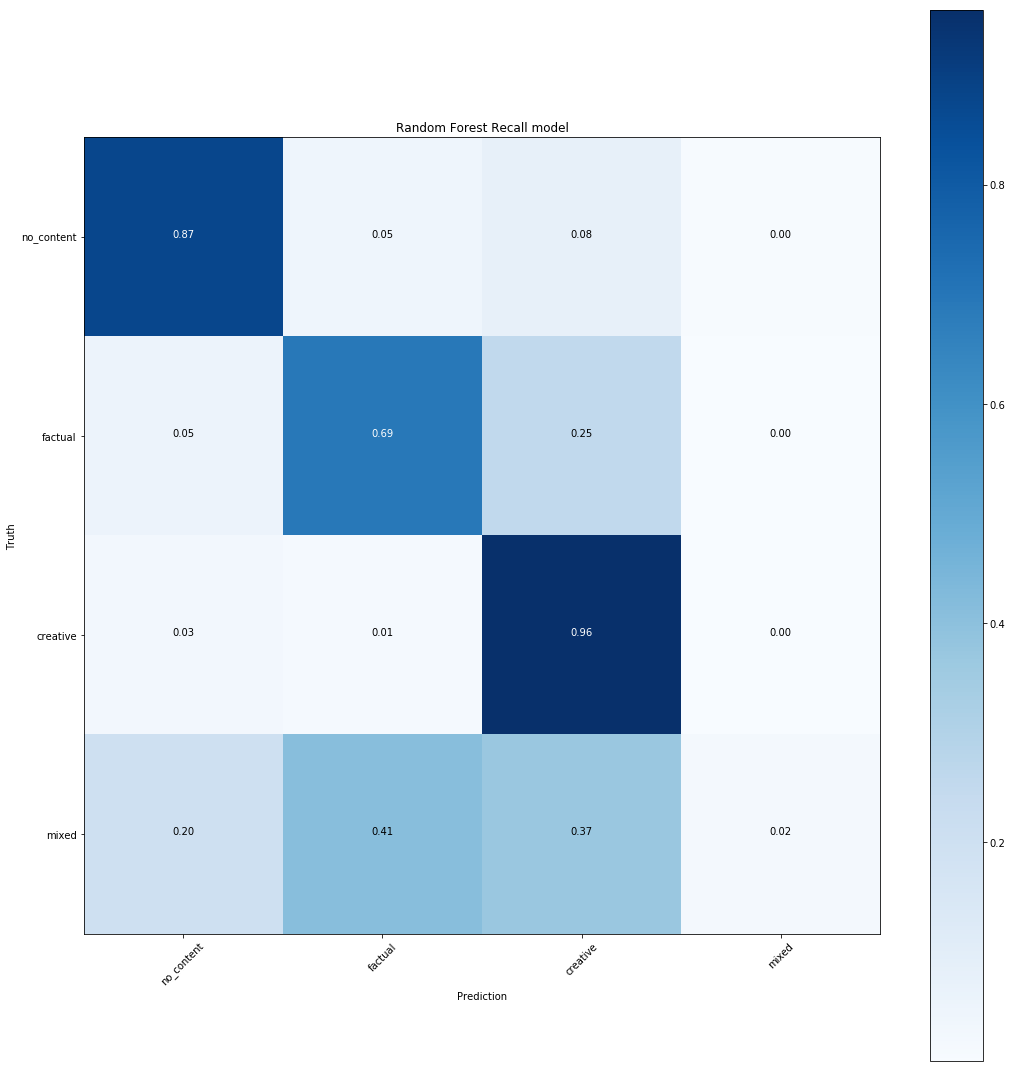

In [0]:
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_hat_test)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=type_list, normalize=True,
                      title="{} model".format("Random Forest Recall"))